In [31]:
import mysql.connector
from mouseBehavior import mouseBehaviorData as mbd
from matplotlib import pyplot as plt
import os
import pandas as pd
import numpy as np
from analysis import checkforMouseBehaviorObject
import analysis

%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [21]:
mouseID = '531237'

In [33]:
save_mouse_obj = True
overwrite = True

#First look to see if there's already a behavior dataframe pkl file with this mouse's data
mouseBehaviorObjectPath = r"\\allen\programs\braintv\workgroups\nc-ophys\corbettb\NP_behavior_pipeline\behavior_sessions\production"
mouseBehaviorPklpath = checkforMouseBehaviorObject(mouseBehaviorObjectPath, mouseID)

if mouseBehaviorPklpath is not None:
    if overwrite:
        print('overwriting data')
        m = mbd(mouse_id=mouseID, daysBeforeHandoff=100)
        m.buildBehaviorDataframe(all_sessions=True, overwrite_behdf=True)
    else:
        print('reading from pickle')
        m = mbd()
        m.loadFromPickle(mouseBehaviorPklpath)
        m.buildBehaviorDataframe(update=True)
else:
    print('fetching data')
    m = mbd(mouse_id=mouseID, daysBeforeHandoff=100)
    m.buildBehaviorDataframe(all_sessions=True)

if save_mouse_obj:
    m.saveDirectory = mouseBehaviorObjectPath
    m.saveToPickle()

print('done')

checking \\allen\programs\braintv\workgroups\nc-ophys\corbettb\NP_behavior_pipeline\behavior_sessions\production for mouse object pkl
Did not find existingmouseBehaviorObject for mouse 531237
fetching data
Loaded data from 200922115910_531237_979655d3-69af-4823-a683-da840d11b4b7.pkl
Loaded data from 200922115910_531237_979655d3-69af-4823-a683-da840d11b4b7.pkl
Loaded data from 200923122347_531237_40e85531-c9af-43f7-8cc6-ba041b5b9a18.pkl
Loaded data from behavior-9307a6db27624e43922986d100d46a2f-531237.pkl
Loaded data from 200924121418_531237_051c27d3-0f31-43b2-ad8a-44c583fe9e16.pkl
Loaded data from behavior-87a0e0102ec7463ea56d403f7a9ca0a1-531237.pkl
Loaded data from 200925115439_531237_a951b309-2a02-47f4-a68d-95db06437705.pkl
Loaded data from behavior-b167a32d73a94b16972dbcefa5774ac6-531237.pkl
Loaded data from behavior-4170381b9020475ab55cbb7646588b1c-531237.pkl
Loaded data from behavior-8d1c3f3c9cd34dd59d0057344a24739f-531237.pkl
Loaded data from behavior-d6b73700b8cc4bff836ae191665d

<IPython.core.display.Javascript object>


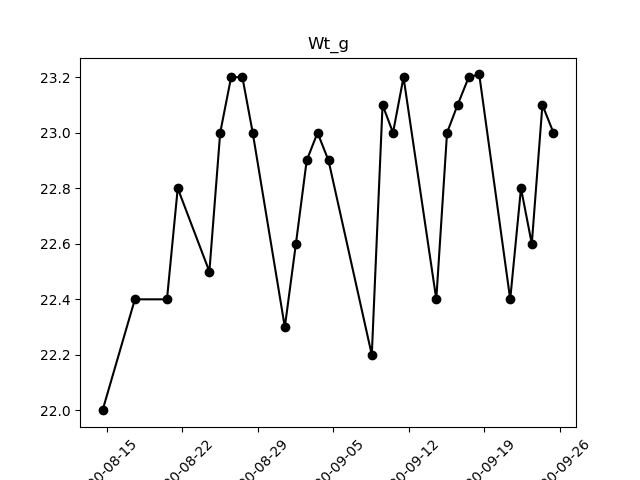

<IPython.core.display.Javascript object>


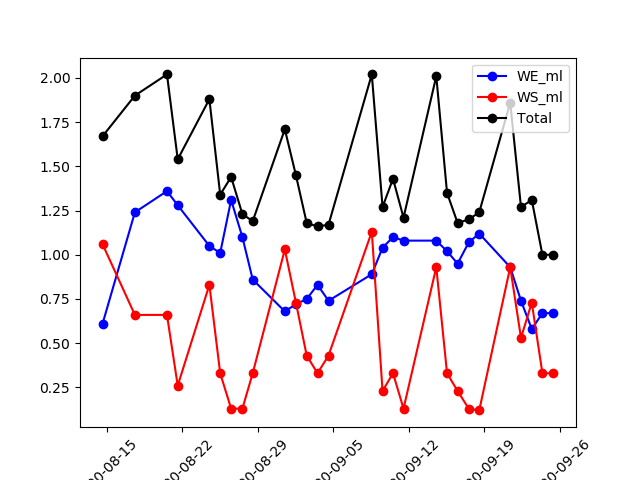

<IPython.core.display.Javascript object>


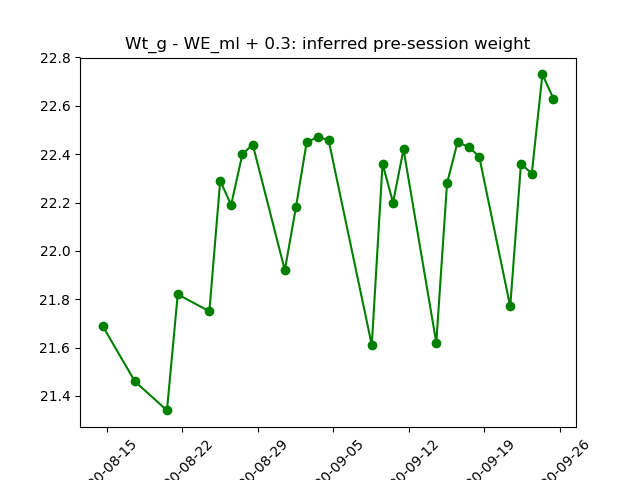

<IPython.core.display.Javascript object>


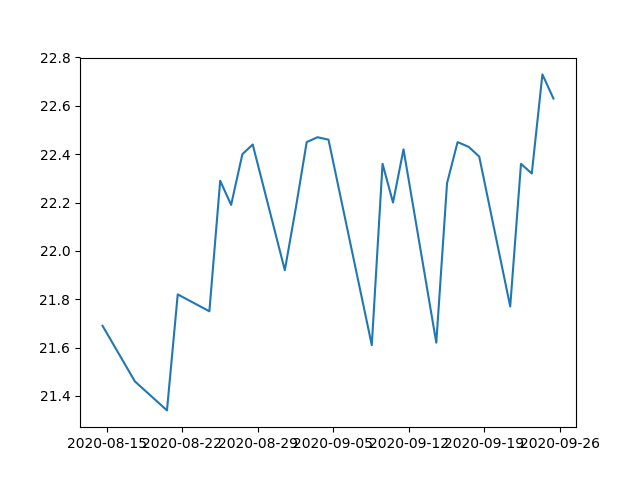

In [72]:
beh_df = analysis.filter_out_pretest(m.beh_df) #filter out the pretest sessions
post_wt = beh_df['Wt_g'].astype(float)
earned_wt = beh_df['WE_ml'].astype(float)
water_loss_during_session=0.3
inferred_wt = post_wt - earned_wt + water_loss_during_session
beh_df['presession_weight'] = inferred_wt

analysis.plot_weight_over_time(beh_df)
analysis.plot_water_allotment(beh_df)
analysis.plot_inferred_presession_weight(beh_df, water_loss_during_session=0.3)
#fig,ax = plt.subplots()
#ax.plot(beh_df['session_datetime_local'], beh_df['presession_weight'])

In [70]:
#plt.title('Rewards for ')# + str(mouseID)
analysis.plotSessionHistory(beh_df)
fig = plt.gcf()
fig.suptitle(mouseID + ' ' 'Rewards per Session', y = 1)
fig.patch.set_facecolor('blue')
fig.patch.set_alpha(0.7)
fig.savefig('\\Users\\taminar\\Desktop\\Behavior_plots\\' + mouseID + '_' + 'rewards.PNG', transparent = False)
fig.savefig('\\Users\\taminar\\Desktop\\Behavior_plots\\' + mouseID + '_' + 'rewards.PDF', transparent = False)
import time
#title = mouseID + 'Rewards'
# if os.path.exists('\\Users\\taminar\\Desktop\\Behavior_plots\\' + str(mouseID) + '_' + 'rewards.pdf'):
#     plt.savefig('\\Users\\taminar\\Desktop\\Behavior_plots\\' + str(mouseID) + '_' + 'rewards.pdf'.format(int(time.time())))
# else:
#     plt.savefig('\\Users\\taminar\\Desktop\\Behavior_plots\\' + str(mouseID) + '_' + 'rewards.pdf')
print('done')

<IPython.core.display.Javascript object>

IOError: [Errno 13] Permission denied: '\\Users\\taminar\\Desktop\\Behavior_plots\\532246_rewards.PDF'

In [7]:
analysis.plot_weight_vs_rewards_earned(beh_df)

AttributeError: 'module' object has no attribute 'plot_weight_vs_rewards_earned'

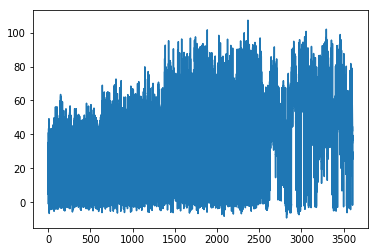

In [50]:
plt.plot(beh_df.iloc[0]['running'][0],beh_df.iloc[0]['running'][1])

In [74]:
beh_df.head()
beh_df.iloc[0]

FA_rate_engaged                                                      0.0833333
Maternal_Index                                                          518039
Paternal_Index                                                          517768
WE_ml                                                                     0.67
WS_ml                                                                     0.33
Wt_g                                                                        23
abort_rate_engaged                                                    0.460348
age                                                                        139
baseline_weight                                                          27.13
behavior_training_id                                                      None
created_at                                          2020-09-25 19:00:38.292322
date_of_acquisition                                                        NaT
donor_id                                            

<IPython.core.display.Javascript object>


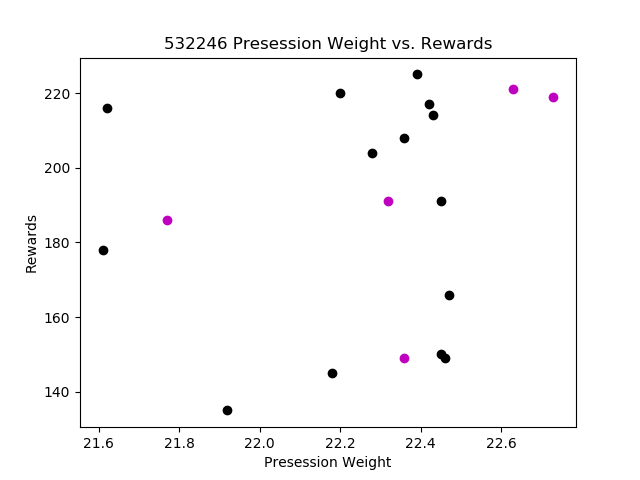

In [79]:
#Filtered df for Handoff Ready Sessions
handoff_ready_beh_df = analysis.filter_sessions_by_stage(beh_df, filter_string='handoff_ready')
fig, ax = plt.subplots()
for ir, row in handoff_ready_beh_df.iterrows():
    a = 1
    f = 'full'
    if 'NP' not in row['rig']:
        c = 'k'
    elif 'HAB' in row['stage']:
        c = 'm'
    elif 'EPHYS' in row['stage']:
        c = 'g'
            
    if '3uL' in row['stage']:
        a = 0.3
        
    ax.plot(row['presession_weight'], row['total_rewards'], c+'o')
    
ax.set_title(mouseID + ' ' + 'Presession Weight vs. Rewards')
ax.set_xlabel('Presession Weight')
ax.set_ylabel('Rewards')
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.7)
fig.savefig('\\Users\\taminar\\Desktop\\WeightRewards\\' + mouseID + '_' + 'WeightRewards.PNG', transparent = False)
fig.savefig('\\Users\\taminar\\Desktop\\WeightRewards\\' + mouseID + '_' + 'WeightRewards.PDF', transparent = False)          


Text(0,0.5,u'Rewards')

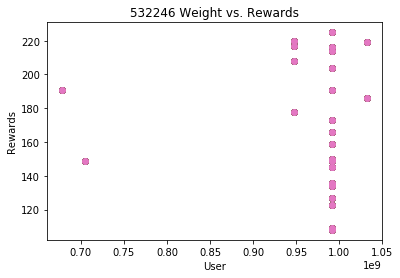

In [27]:
fig, ax = plt.subplots()
for ir, row in beh_df.iterrows():
    a = 1
    f = 'full'
    if 'NP' not in row['rig']:
        c = 'k'
    elif 'HAB' in row['stage']:
        c = 'm'
    elif 'EPHYS' in row['stage']:
        c = 'g'
            
    if '3uL' in row['stage']:
        a = 0.3
    ax.plot(beh_df['user_id'], beh_df['total_rewards'], 'o')
ax.set_title(mouseID + ' ' + 'Weight vs. Rewards')
ax.set_xlabel('User')
ax.set_ylabel('Rewards')



In [ ]:
fig, ax = plt.subplots()
for ir, row in beh_df.iterrows():
    a = 1
    f = 'full'
    if 'NP' not in row['rig']:
        c = 'k'
    elif 'HAB' in row['stage']:
        c = 'm'
    elif 'EPHYS' in row['stage']:
        c = 'g'
            
    if '3uL' in row['stage']:
        a = 0.3
    ax.plot(beh_df['Wt_g'], beh_df['total_rewards'], 'o')
ax.set_title(mouseID + ' ' + 'Weight vs. Rewards')
ax.set_xlabel('Weight')
ax.set_ylabel('Rewards')

In [17]:
beh_df.head()['stage']

64                        EPHYS_1_images_G_3uL_reward
62    HABITUATION_5_images_G_handoff_ready_3uL_reward
67    HABITUATION_5_images_G_handoff_ready_3uL_reward
53    HABITUATION_5_images_G_handoff_ready_3uL_reward
53    HABITUATION_5_images_G_handoff_ready_5uL_reward
Name: stage, dtype: object

In [30]:
#Simulate mTrain criteria
from mtrain_simulator import meets_hit_threshold_average, \
    meets_engagement_criteria_logged, meets_engagement_and_hit_threshold

alltrials = m.beh_df['trials'].to_list()
alltrials = pd.concat(alltrials)

class Mouse():
    
    def __init__(self, tc):
        self.trials = tc
        self.LabTracks_ID = '00000'
        self.session_summary = {}

mouse = Mouse(alltrials)
import logging
print(meets_hit_threshold_average(mouse))
print(meets_engagement_criteria_logged(mouse))
print(meets_engagement_and_hit_threshold(mouse))

behavior_session_uuid
c94b57ae-c553-4617-b9c0-42cc455e7d13      0.0
7c854164-1dfb-4ce9-a626-ce2030912f53     68.0
248f4c09-b13e-414b-9b17-1704ad7b82ad    108.0
808e40f5-28d4-44c4-9906-1e44267b59f1     85.0
2ae104d1-99c7-4175-96ca-4861ccd46de0     44.0
c3a5500c-a9b1-4201-b70a-902de9d75a49     37.0
0b333253-0069-43fe-979a-7b2764197965      2.0
ca837ee4-d4a4-4664-92fb-ece69147e66e      2.0
85ad2f26-f103-4597-b59d-9813d726e18a     12.0
ceef7da2-9dbf-482c-a871-7e224cf673cf      3.0
774891f7-e0f3-4641-bca5-8fd05cf46938      2.0
b1943625-3023-424c-9b11-6711fc12ddda      4.0
b8b79d20-04fb-49a4-afa1-7ceebe0234a6      1.0
383c196b-81c0-4b12-a7cd-8970815039a8      1.0
e261f6ce-218c-4399-84d6-4629bb7228cd      1.0
34d39b7b-afef-40aa-b96c-e242c11fb149      1.0
bb1d4100-a716-4862-a763-ac2a9ba962e6      2.0
66f850eb-ac22-4a55-9a51-5caf54b42407      4.0
4bc329c9-befb-4786-848d-80ae08d92b83      5.0
ab10d7f0-dfe8-4119-a22b-877e25c81bc2     43.0
ada1d0a0-485f-4382-ba4d-6cdfd9135686     91.0
7f980151-30c

In [67]:
beh_df['saturation_point'] = beh_df.apply(lambda row: analysis.findSaturationTime(row['trials']), axis=1)
beh_df['fraction_aborted'] = beh_df.apply(lambda row: analysis.findAbortFraction(row['trials']), axis=1)

ValueError: cannot reindex from a duplicate axis

In [64]:
trialdf = beh_df.iloc[0]['trials']
trialdf.head()

#trial_types = trialdf['trial_type']
#(np.sum(trial_types=='aborted'))/float(len(trial_types))

,index,auto_rewarded,change_contrast,change_frame,change_image_category,change_image_name,change_ori,change_time,cumulative_reward_number,cumulative_volume,...,number_of_rewards,rig_id,trial_type,lick_frames,reward_licks,reward_lick_count,reward_lick_latency,reward_rate,response,color
0,0,True,None,285.0,im044_r,im044_r,None,4.754079,1,0.005,...,1,NP.0-Stim,autorewarded,"[320, 327, 335, 344, 353, 363, 371, 381, 389, ...","[0.43368365871720016, 0.5504811927676201, 0.68...",14,0.433684,inf,1.0,darkblue
1,1,True,None,NaN,im044_r,im044_r,None,NaN,1,0.005,...,0,NP.0-Stim,aborted,[665],[],0,NaN,inf,0.0,lightgray
2,2,True,None,871.0,im047_r,im047_r,None,14.529145,2,0.010,...,1,NP.0-Stim,autorewarded,"[899, 905, 912, 919, 927, 935, 945, 953, 962, ...","[0.3002572290133685, 0.40034277690574527, 0.51...",14,0.300257,inf,1.0,darkblue
3,3,True,None,1501.0,im078_r,im078_r,None,25.038138,3,0.015,...,1,NP.0-Stim,autorewarded,"[1530, 1536, 1543, 1552, 1561, 1569, 1578, 158...","[0.3336206388194114, 0.43370384629815817, 0.55...",10,0.333621,inf,1.0,darkblue
4,4,True,None,1951.0,im047_r,im047_r,None,32.544621,4,0.020,...,1,NP.0-Stim,autorewarded,"[1980, 1987, 1994, 2001, 2010, 2019, 2028, 203...","[0.3169276698026806, 0.43370969756506383, 0.55...",11,0.316928,inf,1.0,darkblue


<IPython.core.display.Javascript object>


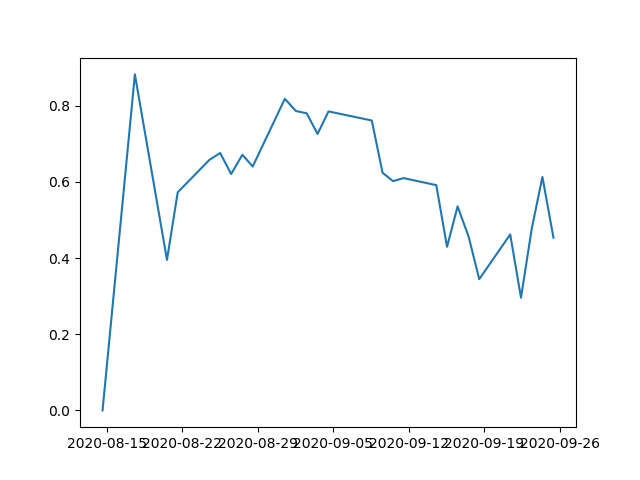

In [66]:
fig,ax = plt.subplots()
ax.plot(beh_df['session_datetime_local'], beh_df['fraction_aborted'])

<IPython.core.display.Javascript object>


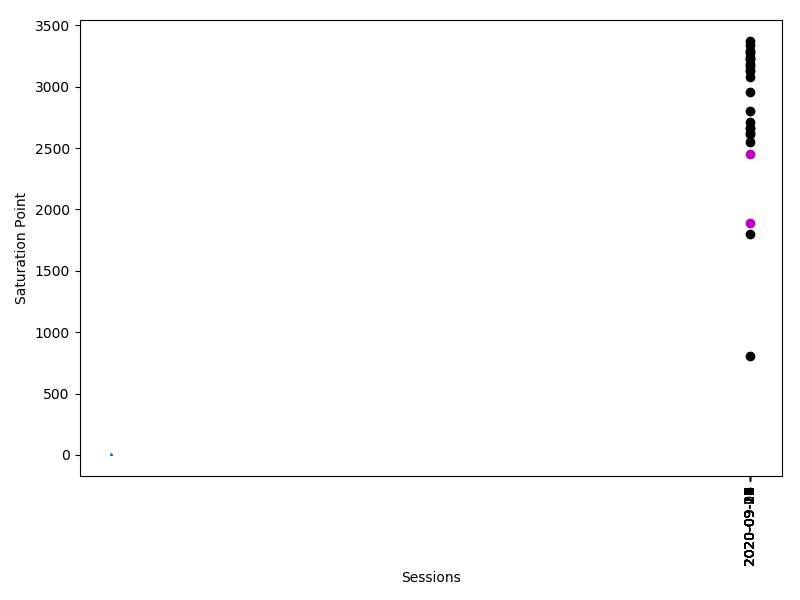

In [54]:
def getColors(row):
    a = 1
    f = 'full'
    if 'NP' not in row['rig']:
        c = 'k'
    elif 'HAB' in row['stage']:
        c = 'm'
    else:
        c = 'g'
        
    if '3uL' in row['stage']:
        a = 0.2
    
    return c,a,f

fig, ax = plt.subplots()
fig.set_size_inches([8,6])

for ir, row in beh_df.iterrows(): 
    #beh_df[['saturation_point', 'session_datetime_local']]
    c,a,f = getColors(row)
    ax.plot(row['session_datetime_local'], row['saturation_point'], c+'-o', linewidth = 2, alpha=a)
    

ax.set_xlabel('Sessions')
ax.set_ylabel('Saturation Point')
ax.set_xticks([row['session_datetime_local'] for _,row in beh_df.iterrows()][::2])
ax.set_xticklabels([row['session_datetime_local'].date() for _,row in beh_df.iterrows()], rotation=90)      
plt.tight_layout()


In [ ]:
beh_df['inferred_presession_weight'] = 

In [48]:
handoff_ready = analysis.filter_sessions_by_stage(beh_df, filter_string=['3uL','handoff_ready'])
handoff_ready.head()

,FA_rate_engaged,Maternal_Index,Paternal_Index,WE_ml,WS_ml,Wt_g,abort_rate_engaged,age,baseline_weight,behavior_training_id,...,stage,storage_directory,temp_output_file_location,timeFromLastSession,total_rewards,trials,updated_at,user_id,weight_datetime,saturation_point
52,0.050000,501498,498833,0.78,0.36,18.2,0.239609,164,21.83,None,...,HABITUATION_5_images_G_handoff_ready_3uL_reward,/allen/programs/braintv/production/visualbehav...,/allen/programs/braintv/production/incoming/vi...,23.413611,256,index auto_rewarded change_contrast chan...,2020-09-02 06:13:02.380987,704511589,2020-09-01 14:36:20,2577.846931
54,0.041667,501498,498833,0.9,0.16,18.4,0.284884,163,21.83,None,...,HABITUATION_5_images_G_handoff_ready_3uL_reward,/allen/programs/braintv/production/visualbehav...,/allen/programs/braintv/production/incoming/vi...,-49.401389,296,index auto_rewarded change_contrast chan...,2020-09-01 06:12:38.467945,678711844,2020-08-31 15:15:19,3051.021044
50,0.000000,501498,498833,0.79,0.21,18.9,0.470219,160,21.83,None,...,HABITUATION_5_images_G_handoff_ready_3uL_reward,/allen/programs/braintv/production/visualbehav...,/allen/programs/braintv/production/incoming/vi...,-97.156111,261,index auto_rewarded change_contrast chan...,2020-08-29 06:08:47.495351,704511589,2020-08-28 13:25:42,2930.183296


In [155]:
hr = beh_df['stage'].str.contains('handoff_ready')
hrd = beh_df.loc[hr]

mean_saturation_time = []
for mouseID, mouse in hrd.groupby(level=0):
    fig, ax = plt.subplots()
    fig.suptitle(mouseID)
    saturationPoints = np.array(mouse.apply(lambda row: findSaturationTime(row['trials']), axis=1))

    for it, r in mouse.iterrows():
        ax.plot(r['trials']['endtime'], r['trials']['cumulative_volume'])
    
    mean_saturation_time.append(np.median(saturationPoints))
    ax.axvline(x=np.median(saturationPoints), c='k')

plt.figure()
plt.plot(mean_saturation_time)

<IPython.core.display.Javascript object>

NameError: ("global name 'findSaturationTime' is not defined", u'occurred at index 4')